In [1]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv('cs-training.csv', index_col=0)

# 统计月收入为空值的记录数
missing_income = data['MonthlyIncome'].isnull().sum()

# 统计家属数量为空值的记录数
missing_dependents = data['NumberOfDependents'].isnull().sum()

# 统计年龄最小值为0的记录数
min_age = (data['age'] == 0).sum()

# 统计月收入最小值为0的记录数
min_income = (data['MonthlyIncome'] == 0).sum()

# 输出结果
print("月收入为空值的记录数：", missing_income)
print("家属数量为空值的记录数：", missing_dependents)
print("年龄最小值为0的记录数：", min_age)
print("月收入最小值为0的记录数：", min_income)

月收入为空值的记录数： 181
家属数量为空值的记录数： 33
年龄最小值为0的记录数： 0
月收入最小值为0的记录数： 16


In [2]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
def add_missing(df):
    process_df=df.iloc[:,[5,0,1,2,3,4,6,7,8,9]]
    # 分成已知特征值和位置特征值两部分
    known=process_df[process_df['MonthlyIncome'].notnull()].to_numpy()
    unknown=process_df[process_df['MonthlyIncome'].isnull()].to_numpy()
    Y=known[:,0]
    X=known[:,1:]
    rfr=RandomForestRegressor(random_state=0, n_estimators=200,max_depth=3,n_jobs=-1)
    rfr.fit(X,Y)
    predicted=rfr.predict(unknown[:,1:])
    df.loc[df['MonthlyIncome'].isnull(),'MonthlyIncome']=predicted
    return df
def set_missing(df):
    # 把已有的数值型特征取出来
    process_df = df.iloc[:, [5, 0, 1, 2, 3, 4, 6, 7, 8, 9]]  # 将待填充的放到第一列
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.MonthlyIncome.notnull()].to_numpy()
    unknown = process_df[process_df.MonthlyIncome.isnull()].to_numpy()
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print(predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.MonthlyIncome.isnull()), 'MonthlyIncome'] = predicted
    return df
data = pd.read_csv('cs-training.csv', index_col=0)
# data = set_missing(data)  # 用随机森林填补比较多的缺失值
data=add_missing(data)
data = data.dropna()  # 删除比较少的缺失值
data = data.drop_duplicates()  # 删除重复项
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000
mean,0.057911,4.869593,51.528438,0.470527,332.635417,5993.396782,8.643226,0.280248,0.985522,0.257497,0.722854
std,0.233696,100.316461,14.864083,4.465755,1155.186657,8254.128217,5.168978,4.420807,1.019376,4.416804,1.069880
min,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034330,40.000000,0.000000,0.165390,2947.186219,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163751,51.000000,0.000000,0.350874,4500.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.536084,62.000000,0.000000,0.688053,7666.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,2340.000000,92.000000,98.000000,15466.000000,208333.000000,31.000000,98.000000,8.000000,98.000000,6.000000


In [3]:
def outlier_processing(df, col):
    """
    离群值处理
    :param df:
    :param col:
    :return:
    """
    s = df[col]
    oneQuoter = s.quantile(0.25)
    threeQuote = s.quantile(0.75)
    irq = threeQuote-oneQuoter
    min = oneQuoter-1.5*irq
    max = threeQuote+1.5*irq
    df = df[df[col] <= max]
    df = df[df[col] >= min]
    return df
data = data[data['age'] > 0]  # 年龄等于0的异常值进行剔除
data = data[data['NumberOfTime30-59DaysPastDueNotWorse'] < 90]  # 剔除异常值
data.describe()
data.to_csv('data.csv')

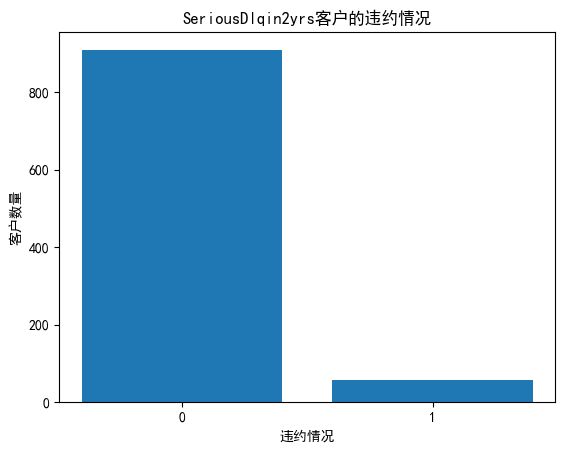

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 绘制SeriousDlqin2yrs客户的违约情况的直方图
plt.hist(data['SeriousDlqin2yrs'], bins=[-0.5, 0.5, 1.5], rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel('违约情况')
plt.ylabel('客户数量')
plt.title('SeriousDlqin2yrs客户的违约情况')
plt.show()

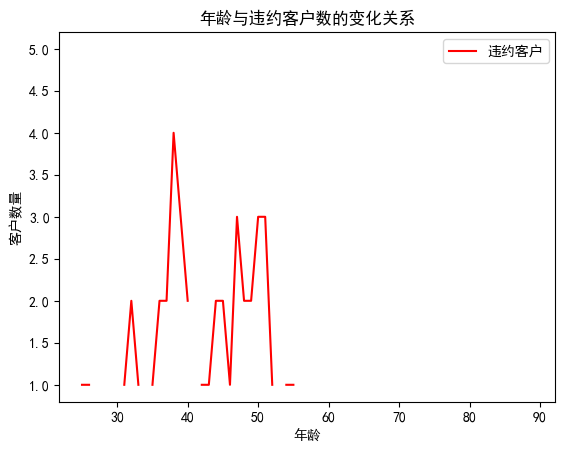

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 计算年龄与违约客户数的变化关系
age_counts = data.groupby(['age', 'SeriousDlqin2yrs']).size().unstack()

# 绘制年龄与违约客户数的变化关系图
age_counts.plot(kind='line', y=1, color='red', label='违约客户')
# age_counts.plot(kind='line', y=0, color='blue', label='好客户')
plt.xlabel('年龄')
plt.ylabel('客户数量')
plt.title('年龄与违约客户数的变化关系')
plt.legend()
plt.show()

相关性低于0.07的特征已删除


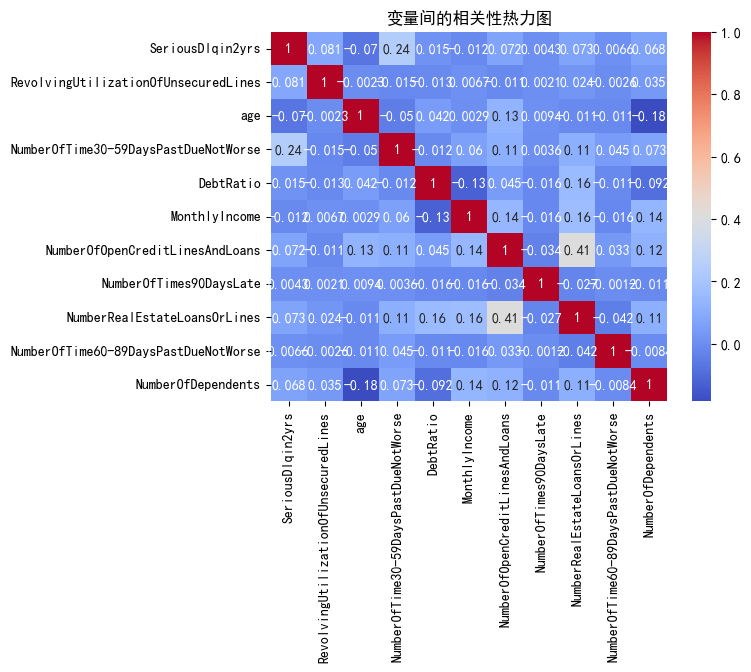

In [6]:
import seaborn as sns
# 计算变量间的相关性
corr_matrix = data.corr()
# 输出结果
print("相关性低于0.07的特征已删除")
corr_matrix = data.corr()

# 绘制相关性矩阵的热力图
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('变量间的相关性热力图')
plt.show()
# 找出相关性低于0.07的特征
low_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) < 0.07:
            low_corr_features.append(corr_matrix.columns[i])

# 去掉相关性低于0.07的特征
data = data.drop(low_corr_features, axis=1)

In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 选取其中的1000条样本数据
df = data

# 分离特征和标签
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立逻辑回归模型
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率为：", accuracy)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
923    0
483    0
175    0
418    0
74     0
      ..
995    0
222    0
574    0
37     0
35     0
Name: SeriousDlqin2yrs, Length: 193, dtype: int64
准确率为： 0.9689119170984456
